# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/My Drive/train-msmes.csv')

Mounted at /content/gdrive


In [3]:
df.head()

,Usaha /Produk Utama,Total Aset (Rp. Juta),Penjualan Rata-rata Per Tahun (Rp.Juta),Jumlah Tenaga Kerja,Tahun Survey,Onclick,Sektor,Nama Badan Hukum,Jumlah Tenaga Kerja.1,Sistem Penjualan,Target Pasar Utama : Produk Masal,Target Pasar Utama : Produk Spesifik,Tingkat Pesaing Usaha,Total Aset,Penjualan Rata-Rata per Tahun,Proyeksi Pertumbuhan Penjualan,Kebutuhan Pembiayaan Kredit,Nilai Aset yang data menjadi jaminan kredit,Jumlah Dokumen Persyaratan Kredit,Kelayakan
0,Pembuatan Kompor,19,230,13,2008,?pm=td/dvAq4gX2E7CtfNVVHlA==&mp=LhrIHvxx5uWPOv...,Industri Pengolahan,Perorangan,13.0,Retail,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,Masyarakat Golongan Menengah (penghasilan Rp 5...,Rendah,"Rp. 19,00 Juta","Rp. 230,00 Juta",30 %/Tahun,"Rp. 0,00 Juta","Rp. 86,00 Juta",5,no
1,Pembuatan Interior Gypsum,12,1.902,20,2008,?pm=4Sx5hz/432FfOSp7BR5uUg==&mp=LhrIHvxx5uWPOv...,Industri Pengolahan,Perorangan,20.0,Retail,"Tidak Ada ÃÂ 0,00ÃÂ %",Masyarakat Golongan Menengah (penghasilan Rp 5...,Sedang,"Rp. 12,00 Juta","Rp. 1.902,00 Juta",20 %/Tahun,"Rp. 10,00 Juta","Rp. 800,00 Juta",7,yes
2,Tenun,116.950.000,52.000.000,1,2013,?pm=InCul0835rm6//zQusdC7w==&mp=fOhzApotY5QnAt...,Industri Pengolahan,Perorangan,1.0,Retail,Masyarakat Golongan Menengah (penghasilan Rp 5...,Masyarakat Golongan Atas (penghasilan lebih da...,Sedang,"Rp. 116.950.000,00 Juta","Rp. 52.000.000,00 Juta",10 %/Tahun,"Rp. 5,00 Juta","Rp. 7,00 Juta",2,no
3,"Dagang Gula, telur","21,1",122,1,2008,?pm=wcw5k+49BtP3GtmSeqiAjg==&mp=LhrIHvxx5uWPOv...,Perdagangan Besar dan Eceran Reparasi dan Pera...,Perorangan,1.0,Retail,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,"Tidak Ada ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ 0,0...",Sedang,"Rp. 21,10 Juta","Rp. 122,00 Juta",10 %/Tahun,"Rp. 2,00 Juta","Rp. 15,00 Juta",4,no
4,Dagang Kelontongan,"25,5",279,1,2011,?pm=ztyHsE4OAqdTMHYYUB6hFw==&mp=Bjv3m4lcInn46O...,Perdagangan Besar dan Eceran Reparasi dan Pera...,Perorangan,1.0,Retail,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,"Tidak Ada ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ 0,0...",Tinggi,"Rp. 25,50 Juta","Rp. 279,00 Juta",10 %/Tahun,"Rp. 10,00 Juta","Rp. 57,00 Juta",5,no


In [4]:
df.shape

(1675, 20)

# Exploratory Data Analysis

## Data Description

1. Usaha /Produk Utama — Nama usaha/produk utama
2. Total Aset (Rp. Juta) — Total aset dari seluruh UMKM
3. Penjualan Rata-rata Per Tahun (Rp.Juta) — Total penjualan rata-rata UMKM dalam satu tahun
4. Jumlah Tenaga Kerja — Jumlah karyawan UMKM
5. Tahun Survey — Tahun dilakukannya survei UMKM
6. Onclick — URL menuju halaman detail UMKM
7. Sektor — Sektor industri UMKM
8. Nama Badan Hukum — Tipe badan hukum UMKM
9. Sistem Penjualan — Sistem yang digunakan dalam penjualan
10. Target Pasar Utama : Produk Masal — Kelompok target massa UMKM dan persentasenya
11. Target Pasar Utama : Produk Spesifik — Kelompok target ritel UMKM dan persentasenya
12. Tingkat Pesaing Usaha — Kelas pesaing usaha di bidang yang sama
13. Proyeksi Pertumbuhan Penjualan — Persentase tingkat pertumbuhan UMKM
14. Kebutuhan Pembiayaan Kredit—Nominal yang diinginkan UMKM untuk dipinjam
15. Nilai Aset yang menjadi jaminan kredit — Nilai aset yang ingin dijamin oleh UMKM
16. Jumlah Dokumen Persyaratan Kredit—Jumlah dokumen persyaratan kredit
17. Kelayakan — Kelayakan untuk memperoleh pendanaan (funding)



Ada beberapa fitur yang redundant, maka bisa kita clean nanti

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1675 entries, 0 to 1674
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Usaha /Produk Utama                          1675 non-null   object 
 1   Total Aset (Rp. Juta)                        1675 non-null   object 
 2   Penjualan Rata-rata Per Tahun (Rp.Juta)      1675 non-null   object 
 3   Jumlah Tenaga Kerja                          1675 non-null   int64  
 4   Tahun Survey                                 1675 non-null   int64  
 5   Onclick                                      1675 non-null   object 
 6   Sektor                                       1675 non-null   object 
 7   Nama Badan Hukum                             1675 non-null   object 
 8   Jumlah Tenaga Kerja.1                        1675 non-null   float64
 9   Sistem Penjualan                             1675 non-null   object 
 10  

In [6]:
df.nunique()

Usaha /Produk Utama                             998
Total Aset (Rp. Juta)                           992
Penjualan Rata-rata Per Tahun (Rp.Juta)         626
Jumlah Tenaga Kerja                              35
Tahun Survey                                      8
Onclick                                        1675
Sektor                                           13
Nama Badan Hukum                                  4
Jumlah Tenaga Kerja.1                            35
Sistem Penjualan                                  4
Target Pasar Utama : Produk Masal               110
Target Pasar Utama : Produk Spesifik            121
Tingkat Pesaing Usaha                             3
Total Aset                                      992
Penjualan Rata-Rata per Tahun                   628
Proyeksi Pertumbuhan Penjualan                   43
Kebutuhan Pembiayaan Kredit                      11
Nilai Aset yang data menjadi jaminan kredit     304
Jumlah Dokumen Persyaratan Kredit                13
Kelayakan   

Dapat dilihat bahwa ada beberapa fitur yang seharusnya bernilai numerik, namun terdeteksi sebagai objek

In [7]:
df.isna().sum()

Usaha /Produk Utama                            0
Total Aset (Rp. Juta)                          0
Penjualan Rata-rata Per Tahun (Rp.Juta)        0
Jumlah Tenaga Kerja                            0
Tahun Survey                                   0
Onclick                                        0
Sektor                                         0
Nama Badan Hukum                               0
Jumlah Tenaga Kerja.1                          0
Sistem Penjualan                               0
Target Pasar Utama : Produk Masal              0
Target Pasar Utama : Produk Spesifik           0
Tingkat Pesaing Usaha                          0
Total Aset                                     0
Penjualan Rata-Rata per Tahun                  0
Proyeksi Pertumbuhan Penjualan                 0
Kebutuhan Pembiayaan Kredit                    0
Nilai Aset yang data menjadi jaminan kredit    0
Jumlah Dokumen Persyaratan Kredit              0
Kelayakan                                      0
dtype: int64

In [8]:
df.isnull().sum()

Usaha /Produk Utama                            0
Total Aset (Rp. Juta)                          0
Penjualan Rata-rata Per Tahun (Rp.Juta)        0
Jumlah Tenaga Kerja                            0
Tahun Survey                                   0
Onclick                                        0
Sektor                                         0
Nama Badan Hukum                               0
Jumlah Tenaga Kerja.1                          0
Sistem Penjualan                               0
Target Pasar Utama : Produk Masal              0
Target Pasar Utama : Produk Spesifik           0
Tingkat Pesaing Usaha                          0
Total Aset                                     0
Penjualan Rata-Rata per Tahun                  0
Proyeksi Pertumbuhan Penjualan                 0
Kebutuhan Pembiayaan Kredit                    0
Nilai Aset yang data menjadi jaminan kredit    0
Jumlah Dokumen Persyaratan Kredit              0
Kelayakan                                      0
dtype: int64

# Preprocessing

## Data Cleaning

### Dropping Feature

Drop beberapa fitur
1. Usaha / Produk Utama bisa kita drop karena bersifat unique seperti ID dan kita berfokus kepada prediksi kelayakan by sektor
2. Onclick bisa kita drop karena hanya sebuah URL menuju halaman detail UMKM
3. Tahun survey bisa kita drop karena kita tidak diberikan parameter penentu kelayakan mendapatkan bantuan berdasarkan tahun tertentu
4. Jumlah Tenaga Kerja.1, Penjualan Rata-Rata per Tahun, dan Total Aset bisa kita drop karena redundant dengan fitur sebelumnya yang bernilai sama
5. Target Pasar Utama : Produk Masal dan Produk Spesifik bisa kita drop karena tidak termasuk ke faktor utama penilaian kelayakan mendapatkan bantuan

In [9]:
removed_col=[
    'Usaha /Produk Utama',
    'Onclick',
    'Tahun Survey',
    'Jumlah Tenaga Kerja.1',
    'Total Aset',
    'Penjualan Rata-Rata per Tahun',
    'Target Pasar Utama : Produk Masal',
    'Target Pasar Utama : Produk Spesifik'
]
df_clean = df.drop(columns=removed_col)
df_clean

,Total Aset (Rp. Juta),Penjualan Rata-rata Per Tahun (Rp.Juta),Jumlah Tenaga Kerja,Sektor,Nama Badan Hukum,Sistem Penjualan,Tingkat Pesaing Usaha,Proyeksi Pertumbuhan Penjualan,Kebutuhan Pembiayaan Kredit,Nilai Aset yang data menjadi jaminan kredit,Jumlah Dokumen Persyaratan Kredit,Kelayakan
0,19,230,13,Industri Pengolahan,Perorangan,Retail,Rendah,30 %/Tahun,"Rp. 0,00 Juta","Rp. 86,00 Juta",5,no
1,12,1.902,20,Industri Pengolahan,Perorangan,Retail,Sedang,20 %/Tahun,"Rp. 10,00 Juta","Rp. 800,00 Juta",7,yes
2,116.950.000,52.000.000,1,Industri Pengolahan,Perorangan,Retail,Sedang,10 %/Tahun,"Rp. 5,00 Juta","Rp. 7,00 Juta",2,no
3,"21,1",122,1,Perdagangan Besar dan Eceran Reparasi dan Pera...,Perorangan,Retail,Sedang,10 %/Tahun,"Rp. 2,00 Juta","Rp. 15,00 Juta",4,no
4,"25,5",279,1,Perdagangan Besar dan Eceran Reparasi dan Pera...,Perorangan,Retail,Tinggi,10 %/Tahun,"Rp. 10,00 Juta","Rp. 57,00 Juta",5,no
...,...,...,...,...,...,...,...,...,...,...,...,...
1670,"39,5",85,8,Industri Pengolahan,Perorangan,Retail,Sedang,15 %/Tahun,"Rp. 10,00 Juta","Rp. 20,00 Juta",7,no
1671,"10,5","177,6",1,Penyediaan Akomodasi dan Penyediaan Makan Minum,Perorangan,Retail,Sedang,10 %/Tahun,"Rp. 0,00 Juta","Rp. 95,00 Juta",5,no
1672,"3,5",48,2,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Sedang,10 %/Tahun,"Rp. 10,00 Juta","Rp. 8,00 Juta",6,no
1673,"17,2",96,1,Penyediaan Akomodasi dan Penyediaan Makan Minum,Perorangan,Retail,Sedang,10 %/Tahun,"Rp. 10,00 Juta","Rp. 11,00 Juta",4,no


### Transform Anomaly Value

Dikarenakan pada beberapa fitur contohnya Total Aset (Rp. Juta), ada beberapa anomali penulisan data. Dimana data yang seharusnya misal 116.950.000 menjadi 116.95. Namun beberapa data tetap tertulis tetap 116.950.000 <br>
Selain itu, kita juga perlu mengubah fitur numerik yang awalnya object menjadi float

In [10]:
def clean_string_num_col(col):
    df_clean[col] = df_clean[col].str.replace('.', '').str.replace(',', '.')
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    df_clean.loc[df_clean[col] > 99999, col] = df_clean.loc[df_clean[col] > 99999, col] / 1000000

Cleaning untuk Total Aset

In [11]:
print(df_clean['Total Aset (Rp. Juta)'].unique())

['19' '12' '116.950.000' '21,1' '25,5' '168.550.000' '267,25' '14.095.000'
 '231,3' '110' '89' '123' '559,65' '12,5' '144,5' '8,3' '28,28' '7,5'
 '880' '109.700.000' '432' '101.700.000' '80,25' '50,42' '129.000.000'
 '271,5' '11,35' '87' '90' '3' '51,85' '16' '473' '165' '186,75' '10'
 '195' '6' '51' '6,7' '135' '10,9' '201' '111,62' '16,2' '21,5' '23,2'
 '113,6' '265' '49,6' '27' '38,5' '129' '10,5' '132,6' '53' '45,5' '6,5'
 '13,8' '28,62' '67,35' '44' '1,2' '102,05' '9' '52' '381,55' '65,4'
 '176,5' '23' '15,5' '7' '26,5' '257,5' '96' '20,2' '157.000.000' '102,1'
 '4,05' '220,5' '82,7' '68' '22,5' '9,5' '275,28' '43,5' '11' '115' '395'
 '6,8' '125,75' '312' '153,25' '14,05' '117' '381' '74' '27,5' '8,2' '229'
 '266' '186,5' '47,47' '188' '81' '147' '20,6' '413,3' '10,7' '118,5'
 '201,7' '38,02' '151.930.000' '19,5' '133' '77' '17' '1.03' '247,6'
 '101,58' '26,9' '41' '286' '23,5' '67' '63' '235' '13,13' '4,75'
 '142.850.000' '210' '93,5' '22' '2' '546' '24' '34' '990' '43' '169'
 '9

In [12]:
clean_string_num_col('Total Aset (Rp. Juta)')
df_clean['Total Aset (Rp. Juta)']

<ipython-input-10-f6456fa3e95d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_clean[col] = df_clean[col].str.replace('.', '').str.replace(',', '.')


0        19.00
1        12.00
2       116.95
3        21.10
4        25.50
         ...  
1670     39.50
1671     10.50
1672      3.50
1673     17.20
1674    345.00
Name: Total Aset (Rp. Juta), Length: 1675, dtype: float64

Cleaning untuk Penjualan Rata-rata Per Tahun

In [13]:
print(df_clean['Penjualan Rata-rata Per Tahun (Rp.Juta)'].unique())

['230' '1.902' '52.000.000' '122' '279' '296' '56.100.000' '108' '199,26'
 '210' '520' '36' '44' '60' '84' '12' '0' '240' '175' '324' '66.000.000'
 '81' '38.500.000' '336,96' '43,2' '120' '181,9' '317' '1.400' '360' '198'
 '68' '147' '51' '72' '55,5' '189' '600' '49,2' '54' '15' '37' '146,2'
 '18' '102' '300' '145,23' '89,4' '153,2' '49,5' '112' '71' '339' '96'
 '42' '990' '351,2' '238,5' '97,5' '42,3' '259,2' '396' '56' '76' '110'
 '21,67' '176' '23' '45.600.000' '234' '97,2' '28' '1.950' '156' '102,4'
 '148' '140' '13' '250' '144' '46,5' '6' '20' '30' '1.100' '47,5' '169'
 '152' '78' '160' '290' '9' '340' '104' '95' '23,8' '62,4' '37,2' '40,5'
 '47.600.000' '48' '50' '116,4' '1.452' '576' '10' '26' '20,9' '280' '875'
 '11,4' '16' '89' '116' '21.800.000' '393' '345,6' '24' '74,4' '534' '312'
 '370' '960' '4.64' '1.200' '49' '1.440' '290,5' '80' '22,5' '1.552,5'
 '390' '106' '105,6' '164' '288' '265,2' '332' '132' '912' '43,5' '15,2'
 '98,4' '29.400.000' '44.300.000' '64' '411' '38' '2

In [14]:
clean_string_num_col('Penjualan Rata-rata Per Tahun (Rp.Juta)')
df_clean['Penjualan Rata-rata Per Tahun (Rp.Juta)']

<ipython-input-10-f6456fa3e95d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_clean[col] = df_clean[col].str.replace('.', '').str.replace(',', '.')


0        230.0
1       1902.0
2         52.0
3        122.0
4        279.0
         ...  
1670      85.0
1671     177.6
1672      48.0
1673      96.0
1674     285.0
Name: Penjualan Rata-rata Per Tahun (Rp.Juta), Length: 1675, dtype: float64

### Removing Str and Trasnform to Numeric

Cleaning untuk Proyeksi Pertumbuhan Penjualan, dimana kita hanya perlu numerik valuenya

In [15]:
import re
df_clean['Proyeksi Pertumbuhan Penjualan'] = df_clean['Proyeksi Pertumbuhan Penjualan'].apply(lambda x: int(re.search(r'\d+', x).group()))
df_clean['Proyeksi Pertumbuhan Penjualan']

0       30
1       20
2       10
3       10
4       10
        ..
1670    15
1671    10
1672    10
1673    10
1674    20
Name: Proyeksi Pertumbuhan Penjualan, Length: 1675, dtype: int64

Membuat fungsi untuk transformasi / menghapus string value pada fitur agar mendapatkan numerik valuenya saja

In [16]:
def clean_string_num_col_juta(col):
  df_clean[col] = df_clean[col].str.extract(r'(\d+)').astype(float)

Cleaning untuk Kebutuhan Pembiayaan Kredit

In [17]:
clean_string_num_col_juta('Kebutuhan Pembiayaan Kredit ')
df_clean['Kebutuhan Pembiayaan Kredit ']

0        0.0
1       10.0
2        5.0
3        2.0
4       10.0
        ... 
1670    10.0
1671     0.0
1672    10.0
1673    10.0
1674     0.0
Name: Kebutuhan Pembiayaan Kredit , Length: 1675, dtype: float64

In [18]:
clean_string_num_col_juta('Nilai Aset yang data menjadi jaminan kredit')
df_clean['Nilai Aset yang data menjadi jaminan kredit']

0        86.0
1       800.0
2         7.0
3        15.0
4        57.0
        ...  
1670     20.0
1671     95.0
1672      8.0
1673     11.0
1674    200.0
Name: Nilai Aset yang data menjadi jaminan kredit, Length: 1675, dtype: float64

Fitur Total Aset, Penjualan Rata-rata, dan Proyeksi Pertumbuhan sudah dikonversi agar tidak berupa object lagi

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1675 entries, 0 to 1674
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Total Aset (Rp. Juta)                        1675 non-null   float64
 1   Penjualan Rata-rata Per Tahun (Rp.Juta)      1675 non-null   float64
 2   Jumlah Tenaga Kerja                          1675 non-null   int64  
 3   Sektor                                       1675 non-null   object 
 4   Nama Badan Hukum                             1675 non-null   object 
 5   Sistem Penjualan                             1675 non-null   object 
 6   Tingkat Pesaing Usaha                        1675 non-null   object 
 7   Proyeksi Pertumbuhan Penjualan               1675 non-null   int64  
 8   Kebutuhan Pembiayaan Kredit                  1675 non-null   float64
 9   Nilai Aset yang data menjadi jaminan kredit  1675 non-null   float64
 10  

## One Hot Encoding

Transformasi kategorikal value menjadi nilai 0 atau 1 berdasarkan apakah dia benar atau tidak

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False) 

categorical_cols = ['Sektor','Nama Badan Hukum','Sistem Penjualan','Tingkat Pesaing Usaha','Kelayakan'] 

array_hot_encoded = ohe.fit_transform(df_clean[categorical_cols])
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=df_clean.index)
data_hot_encoded.columns = ohe.get_feature_names_out(categorical_cols)
data_other_cols = df_clean.drop(columns=categorical_cols)

df_transform = pd.concat([data_hot_encoded, data_other_cols], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Fitur Kelayakan_yes dan Kelayakan_no hanya berkebalikan sehingga bisa didrop salah satu

In [21]:
df_transform.drop('Kelayakan_no', axis=1, inplace=True)

In [22]:
df_transform

,Sektor_Industri Pengolahan,Sektor_Informasi dan Komunikasi,Sektor_Jasa Kesehatan dan Kegiatan Sosial,Sektor_Jasa Keuangan dan Asuransi,"Sektor_Jasa Profesional, Ilmiah dan Teknis","Sektor_Kesenian, Hiburan dan Rekreasi",Sektor_Konstruksi,"Sektor_Pengadaan Listrik, Gas, Uap Air Panas dan Udara Dingin",Sektor_Penyediaan Akomodasi dan Penyediaan Makan Minum,Sektor_Perdagangan Besar dan Eceran Reparasi dan Perawatan Mobil dan Sepeda Motor,...,Tingkat Pesaing Usaha_Sedang,Tingkat Pesaing Usaha_Tinggi,Kelayakan_yes,Total Aset (Rp. Juta),Penjualan Rata-rata Per Tahun (Rp.Juta),Jumlah Tenaga Kerja,Proyeksi Pertumbuhan Penjualan,Kebutuhan Pembiayaan Kredit,Nilai Aset yang data menjadi jaminan kredit,Jumlah Dokumen Persyaratan Kredit
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,19.00,230.0,13,30,0.0,86.0,5
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,12.00,1902.0,20,20,10.0,800.0,7
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,116.95,52.0,1,10,5.0,7.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,21.10,122.0,1,10,2.0,15.0,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,25.50,279.0,1,10,10.0,57.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,39.50,85.0,8,15,10.0,20.0,7
1671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,10.50,177.6,1,10,0.0,95.0,5
1672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,3.50,48.0,2,10,10.0,8.0,6
1673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,17.20,96.0,1,10,10.0,11.0,4


## Correlation Matrix

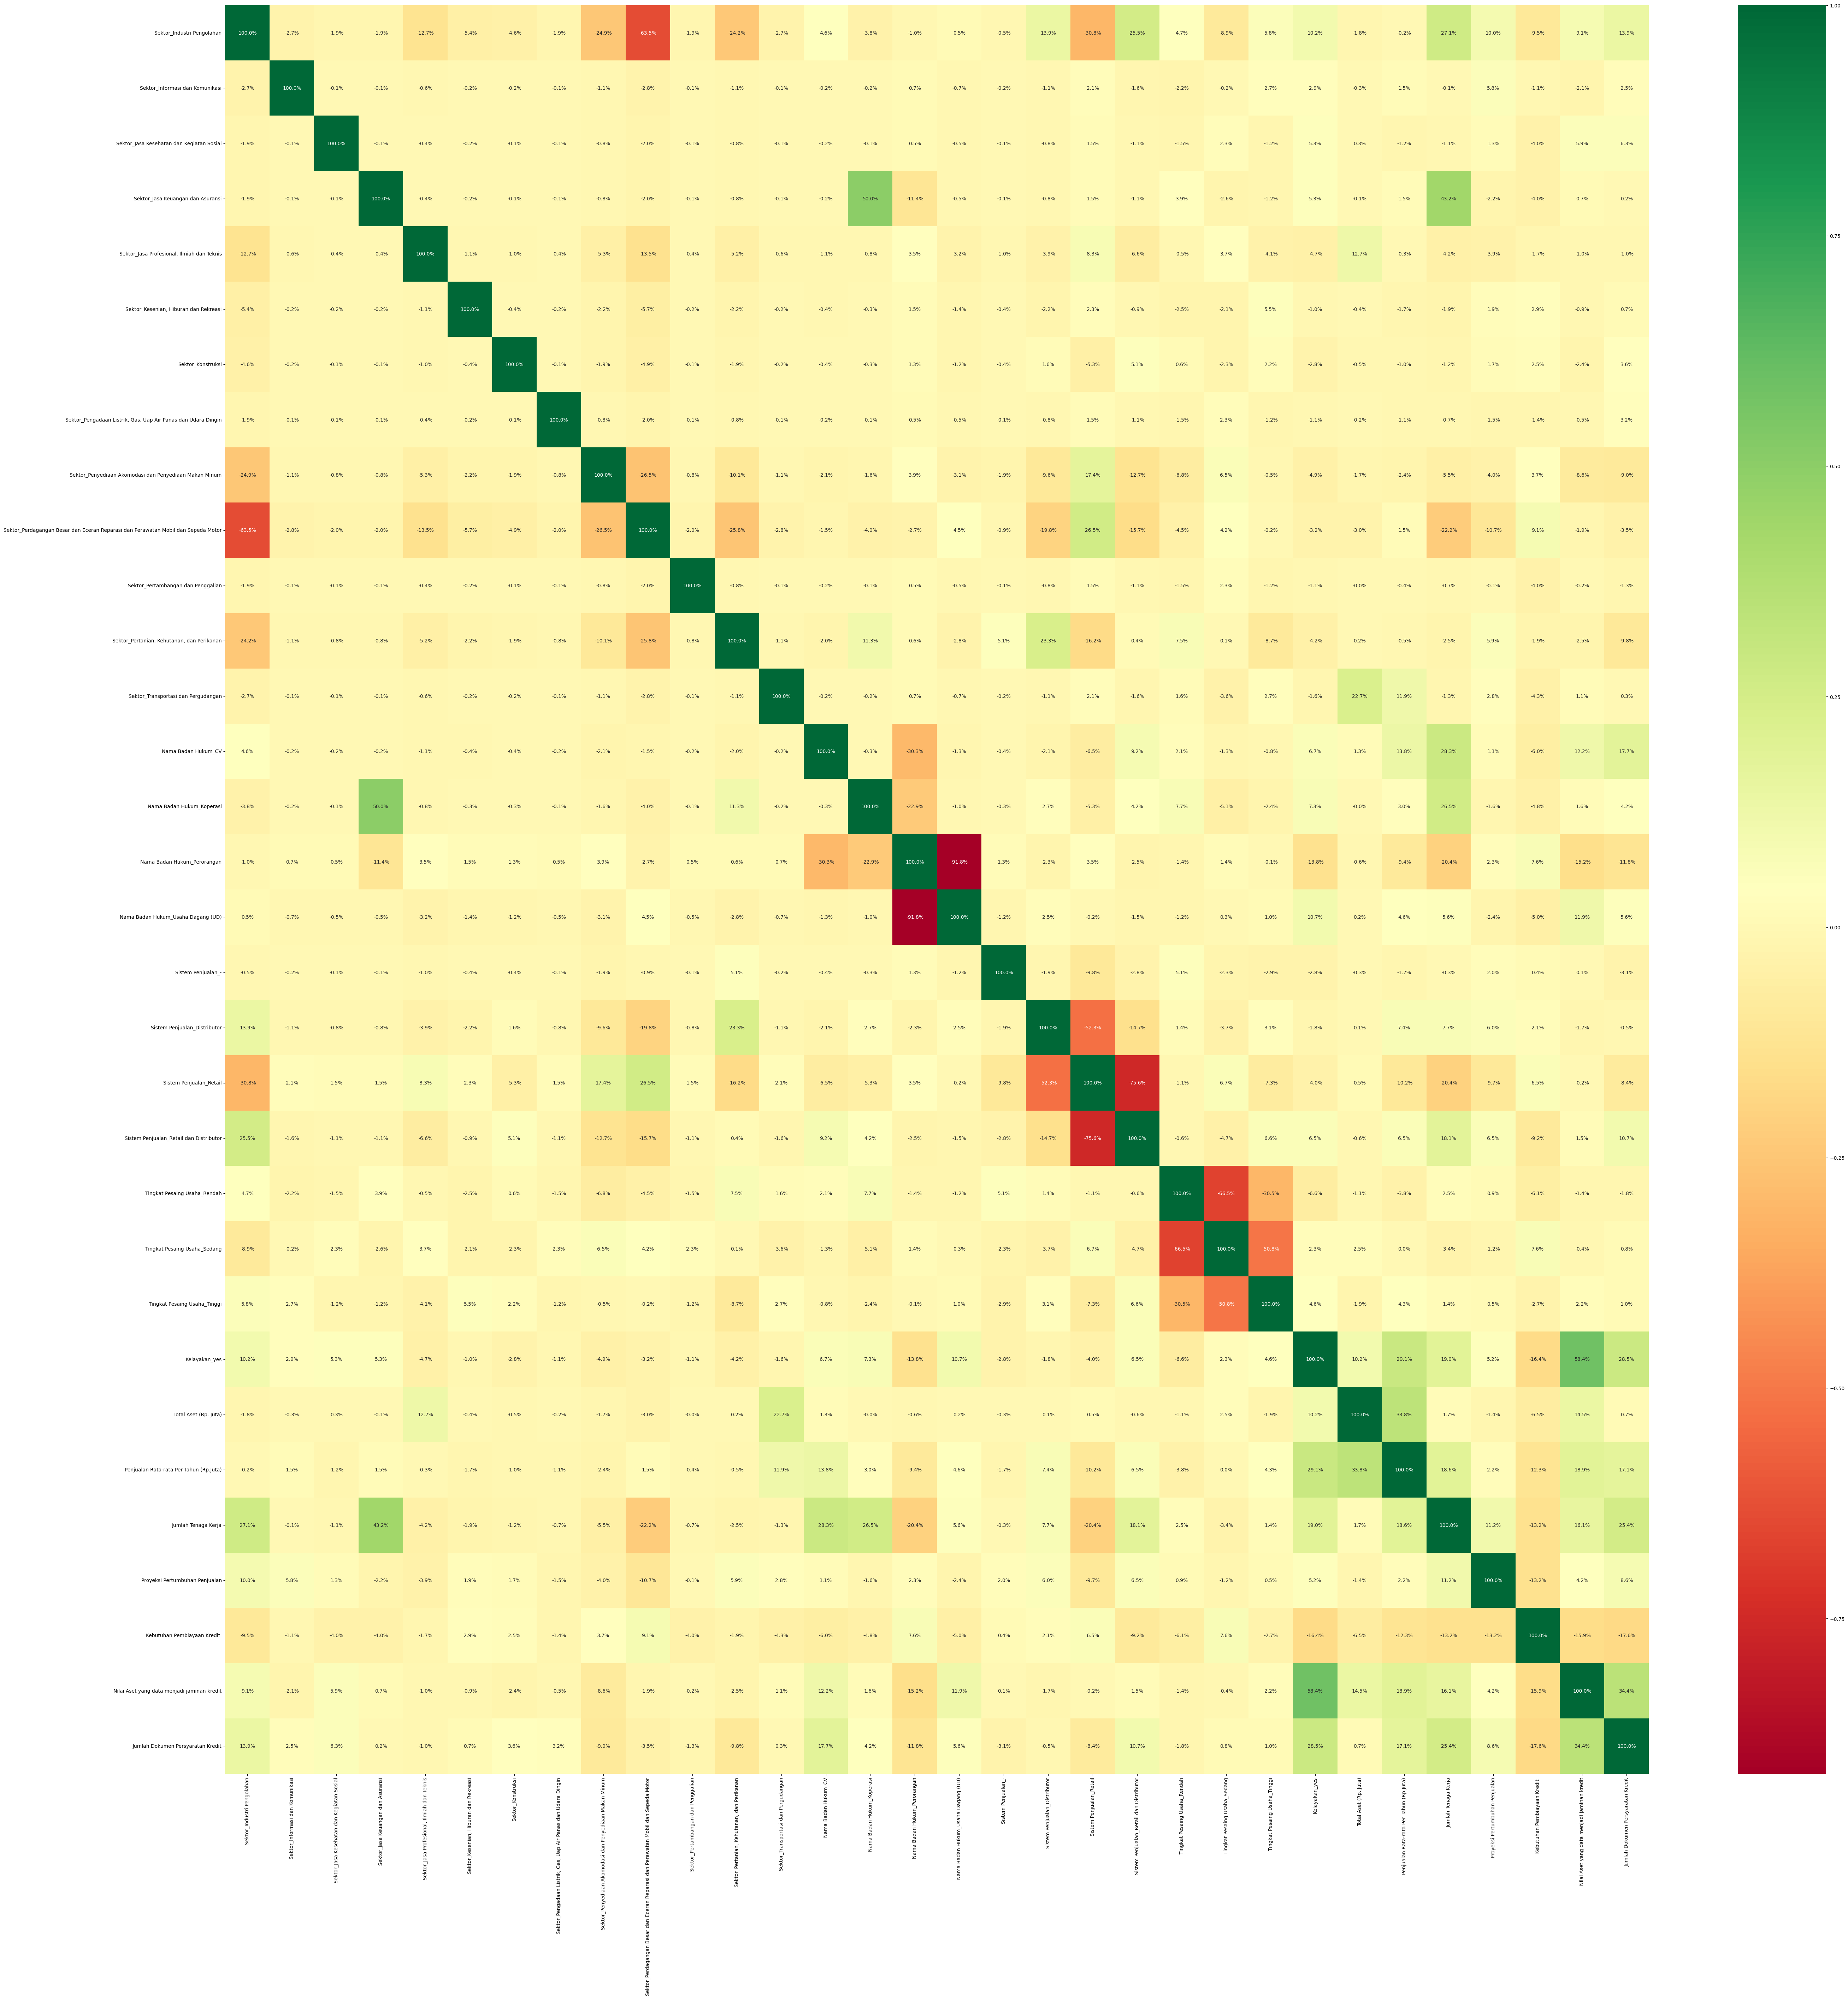

In [27]:
corr = df_transform.corr()
plt.figure(figsize=(65,65))
color = plt.get_cmap('RdYlGn')
color.set_bad('lightblue')
sns.heatmap(corr,annot=True,fmt=".1%", cmap=color)

plt.show()

Filter fitur dengan korelasi lebih dari 0.1

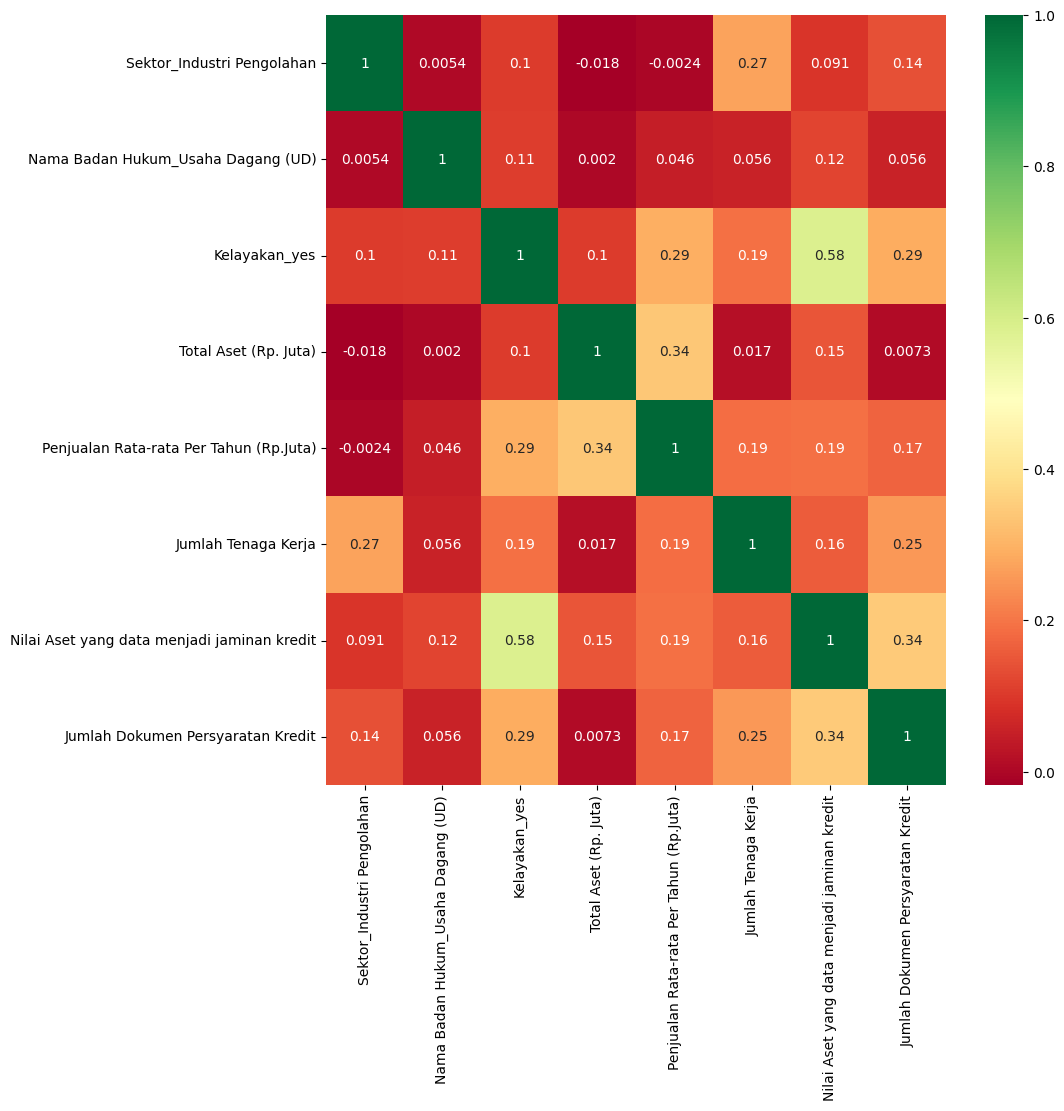

In [28]:
corr_fk32 = corr.loc[corr['Kelayakan_yes'].abs() > 0.1, 'Kelayakan_yes']
cols_fk32 = []
for col in corr_fk32.index.tolist():
    if corr.loc[col, 'Kelayakan_yes'] > 0:
        cols_fk32.append(col)
        
filtered_df = df_transform[cols_fk32]
plt.figure(figsize=(10, 10))
sns.heatmap(df_transform[cols_fk32].corr(), annot=True, cmap=color)
plt.show()

In [33]:
filtered_df

,Sektor_Industri Pengolahan,Nama Badan Hukum_Usaha Dagang (UD),Kelayakan_yes,Total Aset (Rp. Juta),Penjualan Rata-rata Per Tahun (Rp.Juta),Jumlah Tenaga Kerja,Nilai Aset yang data menjadi jaminan kredit,Jumlah Dokumen Persyaratan Kredit
0,1.0,0.0,0.0,19.00,230.0,13,86.0,5
1,1.0,0.0,1.0,12.00,1902.0,20,800.0,7
2,1.0,0.0,0.0,116.95,52.0,1,7.0,2
3,0.0,0.0,0.0,21.10,122.0,1,15.0,4
4,0.0,0.0,0.0,25.50,279.0,1,57.0,5
...,...,...,...,...,...,...,...,...
1670,1.0,0.0,0.0,39.50,85.0,8,20.0,7
1671,0.0,0.0,0.0,10.50,177.6,1,95.0,5
1672,0.0,0.0,0.0,3.50,48.0,2,8.0,6
1673,0.0,0.0,0.0,17.20,96.0,1,11.0,4


## Standardization

In [34]:
filtered_df = filtered_df[['Sektor_Industri Pengolahan', 'Nama Badan Hukum_Usaha Dagang (UD)', 'Total Aset (Rp. Juta)', 'Penjualan Rata-rata Per Tahun (Rp.Juta)', 'Jumlah Tenaga Kerja', 'Nilai Aset yang data menjadi jaminan kredit', 'Jumlah Dokumen Persyaratan Kredit', 'Kelayakan_yes']]

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(filtered_df.drop('Kelayakan_yes', axis=1))
scaled_features = scaler.transform(filtered_df.drop('Kelayakan_yes',axis=1))
df_feat = pd.DataFrame(scaled_features, columns=filtered_df.columns[:-1])
df_feat.head()

,Sektor_Industri Pengolahan,Nama Badan Hukum_Usaha Dagang (UD),Total Aset (Rp. Juta),Penjualan Rata-rata Per Tahun (Rp.Juta),Jumlah Tenaga Kerja,Nilai Aset yang data menjadi jaminan kredit,Jumlah Dokumen Persyaratan Kredit
0,1.294496,-0.196055,-0.112612,0.035189,1.564995,-0.166119,0.095178
1,1.294496,-0.196055,-0.116919,4.005064,2.738541,4.663947,1.326238
2,1.294496,-0.196055,-0.052343,-0.387441,-0.446798,-0.700538,-1.751414
3,-0.772502,-0.196055,-0.111320,-0.221238,-0.446798,-0.646420,-0.520353
4,-0.772502,-0.196055,-0.108612,0.151531,-0.446798,-0.362298,0.095178


## Split Dataset

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features, filtered_df['Kelayakan_yes'], test_size=0.20)

# Model ML

## KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(Y_test, y_pred_knn))
print (classification_report(Y_test, y_pred_knn))
print ('Accuracy Score: ' + str(accuracy_score(Y_test, y_pred_knn)))

[[258   9]
 [ 23  45]]
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       267
         1.0       0.83      0.66      0.74        68

    accuracy                           0.90       335
   macro avg       0.88      0.81      0.84       335
weighted avg       0.90      0.90      0.90       335

Accuracy Score: 0.9044776119402985


In [41]:
error_rate = []

for i in range(1,40): # Checking every possible k value between 1-40
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))
    
error_rate

[0.11940298507462686,
 0.10746268656716418,
 0.0955223880597015,
 0.09850746268656717,
 0.0955223880597015,
 0.10149253731343283,
 0.08358208955223881,
 0.0955223880597015,
 0.09253731343283582,
 0.10746268656716418,
 0.09850746268656717,
 0.11343283582089553,
 0.1044776119402985,
 0.11044776119402985,
 0.11343283582089553,
 0.11343283582089553,
 0.11343283582089553,
 0.11343283582089553,
 0.11343283582089553,
 0.11940298507462686,
 0.11940298507462686,
 0.11940298507462686,
 0.11940298507462686,
 0.12835820895522387,
 0.12835820895522387,
 0.1253731343283582,
 0.13134328358208955,
 0.13432835820895522,
 0.13134328358208955,
 0.13134328358208955,
 0.13432835820895522,
 0.13432835820895522,
 0.13432835820895522,
 0.1373134328358209,
 0.1373134328358209,
 0.14029850746268657,
 0.14029850746268657,
 0.14029850746268657,
 0.14029850746268657]

Text(0, 0.5, 'Mean error rate')

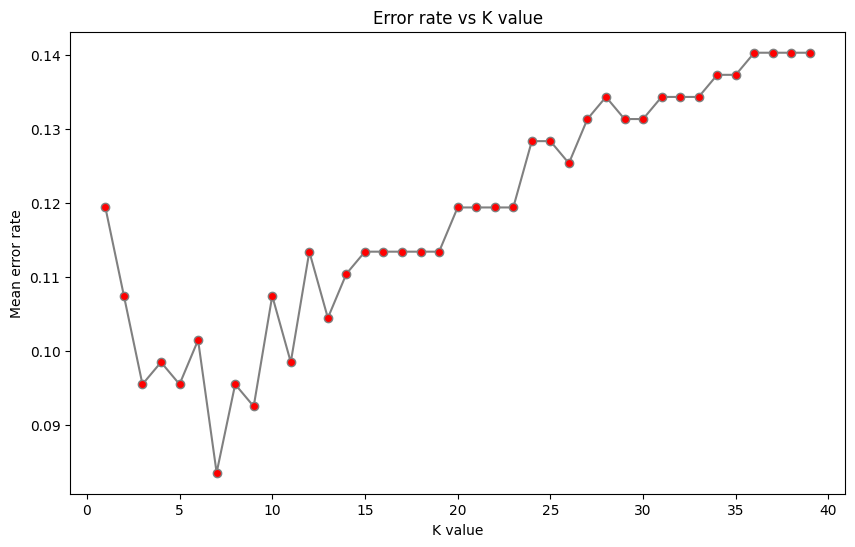

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='grey', marker='o', markerfacecolor='red')
plt.title('Error rate vs K value')
plt.xlabel('K value')
plt.ylabel('Mean error rate')

In [44]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
y_pred_after_knn = knn.predict(X_test)

print (confusion_matrix(Y_test, y_pred_after_knn))
print (classification_report(Y_test, y_pred_after_knn))
print ('Accuracy Score: ' + str(accuracy_score(Y_test, y_pred_after_knn)))

[[260   7]
 [ 21  47]]
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       267
         1.0       0.87      0.69      0.77        68

    accuracy                           0.92       335
   macro avg       0.90      0.83      0.86       335
weighted avg       0.91      0.92      0.91       335

Accuracy Score: 0.9164179104477612


## Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
y_pred_rfc = rfc.predict(X_test)

In [46]:
print (confusion_matrix(Y_test, y_pred_rfc))
print (classification_report(Y_test, y_pred_rfc))
print ('Accuracy Score: ' + str(accuracy_score(Y_test, y_pred_rfc)))

[[263   4]
 [ 10  58]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       267
         1.0       0.94      0.85      0.89        68

    accuracy                           0.96       335
   macro avg       0.95      0.92      0.93       335
weighted avg       0.96      0.96      0.96       335

Accuracy Score: 0.9582089552238806


## Ada Boost

In [47]:
from sklearn.ensemble import AdaBoostClassifier
adaclf = AdaBoostClassifier(n_estimators=100, random_state=0)
adaclf.fit(X_train,Y_train)
Y_pred_adaboost = adaclf.predict(X_test)

In [48]:
print (confusion_matrix(Y_test, Y_pred_adaboost))
print (classification_report(Y_test, Y_pred_adaboost))
print ('Accuracy Score: ' + str(accuracy_score(Y_test, Y_pred_adaboost)))

[[267   0]
 [ 11  57]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       267
         1.0       1.00      0.84      0.91        68

    accuracy                           0.97       335
   macro avg       0.98      0.92      0.95       335
weighted avg       0.97      0.97      0.97       335

Accuracy Score: 0.9671641791044776
